In [4]:
import json
import math
import torch
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
# acc_softmax = '/home/sq/YYM/dum/results/active_learning/2024_10_07_12_38_13/test_accs_resnet18_sn_3.0_mod_seed_1_entropy_cifar10_0.0.json'
# acc_gmm = '/home/sq/YYM/dum/results/active_learning/2024_10_07_12_04_56/test_accs_resnet18_sn_3.0_mod_seed_1_gmm_cifar10_0.0.json'
# acc_gmm_ip = '/home/sq/YYM/dum/results/active_learning/2024_10_08_09_44_01/test_accs_resnet18_sn_3.0_mod_seed_1_gmm_input_perturbation_cifar10_0.01.json'
# acc_ensemble = '/home/sq/YYM/dum/results/active_learning/2024_10_08_17_00_03/test_accs_resnet18_sn_3.0_mod_seed_1_ensemble_cifar10_0.0.json'

acc_softmax = '/home/sq/YYM/dum/results/active_learning/mnist/2024_12_22_22_22_40/test_accs_resnet18_seed_1_entropy_mnist_0.0.json'
acc_gmm = '/home/sq/YYM/dum/results/active_learning/mnist/2024_10_04_00_23_43/test_accs_resnet18_sn_3.0_mod_seed_1_gmm_mnist.json'
acc_gmm_ip = '/home/sq/YYM/dum/results/active_learning/mnist/2024_10_04_01_17_45/test_accs_resnet18_sn_3.0_mod_seed_1_gmm_input_perturbation_mnist.json'
acc_ensemble = '/home/sq/YYM/dum/results/active_learning/mnist/2024_10_04_02_26_45/test_accs_resnet18_sn_3.0_mod_seed_1_ensemble_mnist.json'


In [6]:
# Load files
file_names = {
    acc_ensemble: None,
    acc_softmax: None,
    acc_gmm: None,
    acc_gmm_ip: None
}

for file_name in file_names.keys():
    with open(file_name, "r") as fp:
        jsn = json.load(fp)
    file_names[file_name] = jsn

In [7]:
# Compute mean and standard error
def mean_var (res_dict):
    vecs = []
    for run in res_dict.keys():
        vecs.append(torch.Tensor(res_dict[run]))
    vecs = torch.stack(vecs, dim=0)
    n = vecs.shape[0]
    mean_vecs = torch.mean(vecs, dim=0)
    std_vecs = torch.std(vecs, dim=0) / math.sqrt(n)
    return mean_vecs, std_vecs

mean_dict = {}
std_dict = {}

for file_name in file_names.keys():
    jsn = file_names[file_name]
    mean_vec, std_vec = mean_var(jsn)
    mean_dict[file_name] = mean_vec
    std_dict[file_name] = std_vec

In [8]:
clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
print(mean_dict[acc_ensemble].shape)
print(mean_dict[acc_gmm].shape)
print(mean_dict[acc_gmm_ip].shape)
print(mean_dict[acc_softmax].shape)

torch.Size([29])
torch.Size([29])
torch.Size([29])
torch.Size([29])


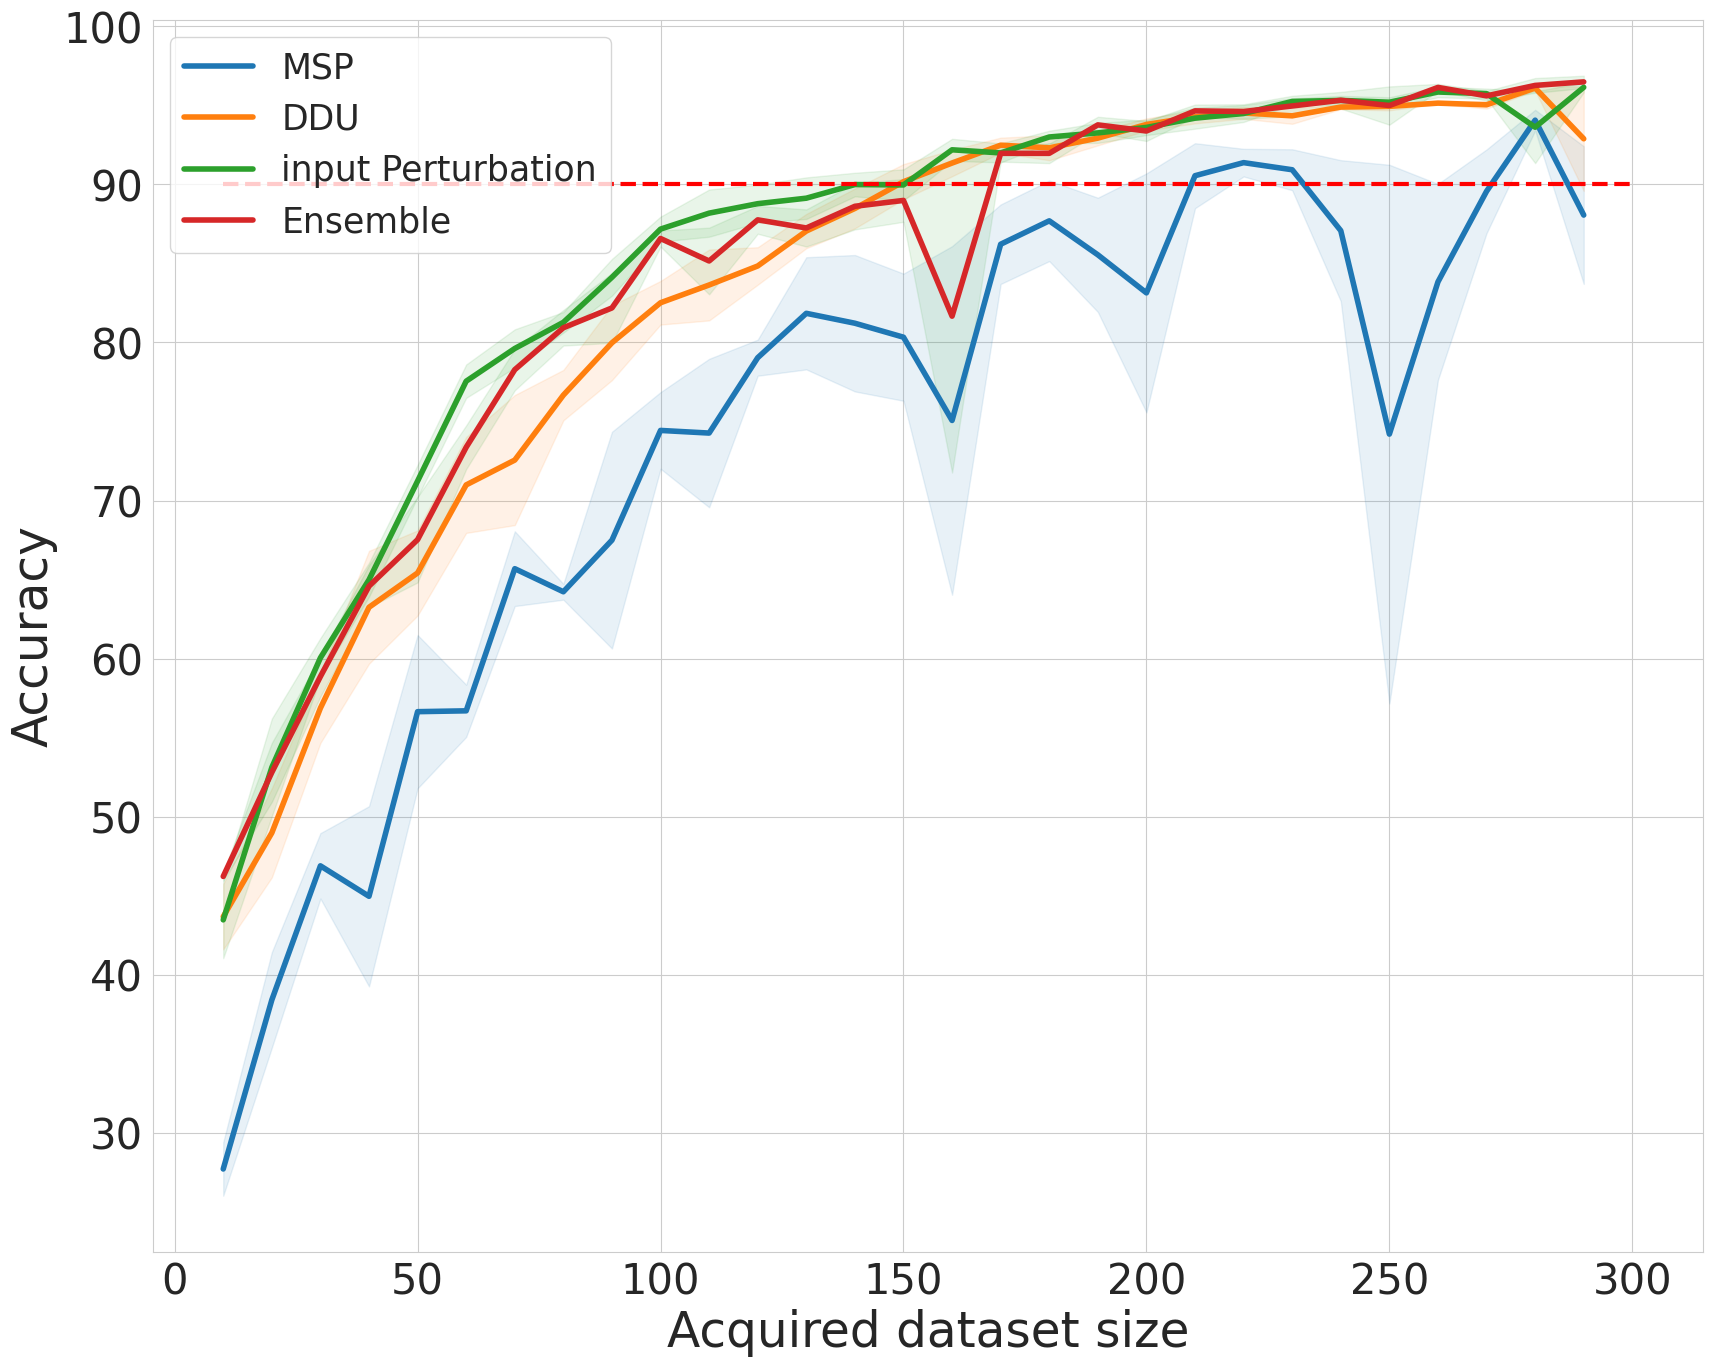

In [12]:
sb.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (20, 16)

nums = mean_dict[acc_softmax].shape[0]
# start = 2000
# end = 21000
# step = 1000
start = 10
end = 300
step = 10
plt.plot([i for i in range(start, end, step)], mean_dict[acc_softmax], linewidth=4, linestyle='-', color=clrs[0], label="MSP")
plt.fill_between([i for i in range(start, end, step)],
                 (mean_dict[acc_softmax]-std_dict[acc_softmax]).numpy().tolist(),
                 (mean_dict[acc_softmax]+std_dict[acc_softmax]).numpy().tolist(),
                 color=clrs[0], alpha=0.1)
plt.plot([i for i in range(start, end, step)], mean_dict[acc_gmm], linewidth=4, linestyle='-', color=clrs[1], label="DDU")
plt.fill_between([i for i in range(start, end, step)],
                 (mean_dict[acc_gmm]-std_dict[acc_gmm]).numpy().tolist(),
                 (mean_dict[acc_gmm]+std_dict[acc_gmm]).numpy().tolist(),
                 color=clrs[1], alpha=0.1)
plt.plot([i for i in range(start, end, step)], mean_dict[acc_gmm_ip], linewidth=4, linestyle='-', color=clrs[2], label="input Perturbation")
plt.fill_between([i for i in range(start, end, step)],
                 (mean_dict[acc_gmm_ip]-std_dict[acc_gmm_ip]).numpy().tolist(),
                 (mean_dict[acc_gmm_ip]+std_dict[acc_gmm_ip]).numpy().tolist(),
                 color=clrs[2], alpha=0.1,)

plt.plot([i for i in range(start, end, step)], mean_dict[acc_ensemble], linewidth=4, linestyle='-', color=clrs[3], label="Ensemble")
plt.fill_between([i for i in range(start, end, step)],
                 (mean_dict[acc_ensemble]-std_dict[acc_ensemble]).numpy().tolist(),
                 (mean_dict[acc_ensemble]+std_dict[acc_ensemble]).numpy().tolist(),
                 color=clrs[2], alpha=0.1,)


plt.hlines(90, start, 300, linestyles="dashed", linewidth=3, color="r")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Acquired dataset size', fontsize=35)
plt.ylabel('Accuracy', fontsize=35)
plt.legend(fontsize=25)
plt.savefig('./pngs/active_learning/mnist_test_accuracy_active_learning.png', bbox_inches='tight')
